In [33]:
# will work on MNIST dataset which ha 28*28 pixels = 784 pixels
# will have 784 input nodes and 10 output nodes since its a multiclass classifiction problem with 0-9 as the output 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [35]:
(x_train ,y_train) ,(x_test , y_test) = keras.datasets.mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

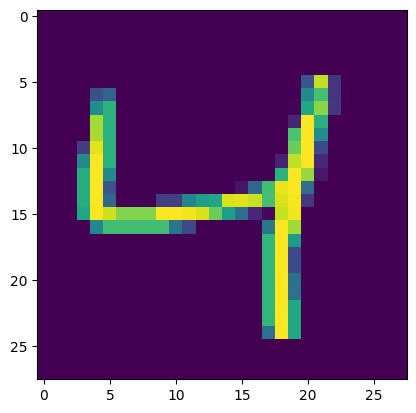

In [37]:
plt.imshow(x_train[2])

In [38]:
# to bring all the values in bw 0-1 /255

In [39]:
x_train = x_train/255
x_test= x_test/255

In [40]:
model = keras.Sequential()

model.add(Flatten(input_shape=(28,28)))
# Flatten converts muti row and column array to 1D array and we need to mention the shape of the array to be converted

model.add(Dense(128,activation="relu"))
# no need to mention the np. of inputs here since output of the flatten is the input

model.add(Dense(10,activation="softmax"))
# 10 output layers
# use softmx for multiclass classification

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 784 inputs * 128 nodes = 100352 + 128 biases = 100480 parameters
# similarly 128 * 10 + 10 biases = 1290 prameters

In [42]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam")
# if u use categorical_crossentropy u need to one hot encode ur dataset while in sparse_categorical_crossentropy u dont need to do that


In [43]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - loss: 0.4835 - val_loss: 0.1600
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 0.1369 - val_loss: 0.1122
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.0897 - val_loss: 0.1101
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1000us/step - loss: 0.0618 - val_loss: 0.0940
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 0.0491 - val_loss: 0.0888
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - loss: 0.0377 - val_loss: 0.0922
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - loss: 0.0284 - val_loss: 0.0912
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 0.0198 - val_loss: 0.0921
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - loss: 0.0186 - val_loss: 0.0980
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.0134 - val_loss: 0.0892


In [45]:
y_prob = model.predict(x_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


array([[4.8806377e-09, 4.4697215e-09, 3.9658360e-08, ..., 9.9990553e-01,
        9.3956466e-08, 2.5408331e-06],
       [9.9072356e-12, 1.1804348e-05, 9.9998796e-01, ..., 5.5178262e-12,
        1.3344408e-08, 4.0059486e-19],
       [1.4676102e-07, 9.9946946e-01, 1.5418483e-04, ..., 9.8155033e-05,
        2.5723033e-04, 3.1993512e-08],
       ...,
       [1.8719350e-18, 1.5867580e-11, 1.4959150e-16, ..., 8.3996881e-08,
        3.1710082e-10, 1.8396091e-06],
       [2.8319792e-18, 2.6883465e-14, 7.2185855e-20, ..., 4.0278270e-14,
        6.4039817e-08, 2.0793096e-16],
       [5.0914478e-10, 1.3973199e-16, 1.0193608e-09, ..., 9.3355386e-17,
        7.3188414e-11, 4.7519527e-15]], dtype=float32)

In [46]:
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9782